In [ ]:
#0. ATTENTION deeppavlov use python 3.6 and python 3.7!!!
#1. install pandas, tensorflow
#2. anaconda (use new environments!!) -> jupiterlab -> terminal
#	-> pip install deeppavlov --user
#3. for models -> pip install russian_tagsets
#   try import deeppavlov and load model, if everything is good, skip steps 4-9
#   if u have warning "Upgrade pyOpenSSL now" -- don't worry, skip this
#4. u can downgrade numpy >> python -m pip install numpy==1.18.0 --force-reinstall --user
#5. u can downgrade pyopenssl >> pip install 'pyOpenSSL==19.1.0' --force-reinstall --user
#6. fuck warnings!!!!!!!!!!!!!!!!!!!!!!!!!
#7. if u have ModuleNotFoundError: No module named 'bert_dp' -> anaconda -> environments -> apply git 
    # -> jupiterlab -> terminal -> python -m deeppavlov install squad_bert
#8 if u have AttributeError: module 'tensorflow' has no attribute 'gfile' -> gg wp -> try to reboot anaconda
#9 if u have trobles with h5py try -> pip install --upgrade pip setuptools wheel
#10. if u have No module named 'tensorflow.compat.v1' -> check tensorflow version
#    -> install version -> 1.10.0 (I use 1.15.0)
#11. if u have No module named 'dependency_decoding' -> pip install git+https://github.com/andersjo/dependency_decoding
#12. for graphs-> pip install igraph
#13. for files format -> pip install conll-df
#14. for plotting -> pip install cairocffi

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
from deeppavlov import build_model, configs

In [3]:
# используем эту модель для синтаксического разбора
model = build_model(configs.syntax.syntax_ru_syntagrus_bert, download=True)

/home/anna/anaconda3/envs/pp/lib/python3.6/site-packages/cryptography/hazmat/backends/openssl/x509.py:17: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  utils.DeprecatedIn35,
2022-03-21 18:07:35.774 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/morpho_tagger/UD2.3/ru_syntagrus.tar.gz download because of matching hashes
2022-03-21 18:07:50.222 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_v1.tar.gz download because of matching hashes
2022-03-21 18:08:04.967 INFO in 'deeppavlov.download'['download'] at line 138: Skipped http://files.deeppavlov.ai/deeppavlov_data/syntax_parser/syntax_ru_syntagrus_bert.tar.gz download because of matching hashes
[nltk_data] Downloading package punkt to /home/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-da

2022-03-21 18:08:10.179 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /home/anna/.deeppavlov/models/syntax_ru_syntagrus/deps.dict]











The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please 

2022-03-21 18:09:24.836 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /home/anna/.deeppavlov/models/syntax_ru_syntagrus/model_joint]



INFO:tensorflow:Restoring parameters from /home/anna/.deeppavlov/models/syntax_ru_syntagrus/model_joint


In [4]:
# просто проверяю что работает
sentences = ["Интересно, что будет, если ввести новое предложение"]
for parse in model(sentences):
    print(parse)

1	Интересно	_	_	_	_	0	root	_	_
2	,	_	_	_	_	4	punct	_	_
3	что	_	_	_	_	4	nsubj	_	_
4	будет	_	_	_	_	1	ccomp	_	_
5	,	_	_	_	_	7	punct	_	_
6	если	_	_	_	_	7	mark	_	_
7	ввести	_	_	_	_	4	advcl	_	_
8	новое	_	_	_	_	9	amod	_	_
9	предложение	_	_	_	_	7	obj	_	_



In [5]:
# теперь поехали. вводим предложение, считаем всё до точки
source = input().split(".")
print(source)

Теперь когда соперничая с тучей плоды мы вызвали вас к жизни наилучшей чтобы самих себя переборов вы не боялись северных ветров чтоб зерна в вас окрепли и созрели чтоб дивно увеличиваясь в теле не знали вы в развитии преград чтоб наша жизнь была сплошной плодовый сад скажите мне какой чудесный клад несете вы поведать человеку?
['Теперь когда соперничая с тучей плоды мы вызвали вас к жизни наилучшей чтобы самих себя переборов вы не боялись северных ветров чтоб зерна в вас окрепли и созрели чтоб дивно увеличиваясь в теле не знали вы в развитии преград чтоб наша жизнь была сплошной плодовый сад скажите мне какой чудесный клад несете вы поведать человеку?']


In [6]:
#source = [x for x in source if x] #удаляем пустые элементы списка, если есть
print(source)

['Теперь когда соперничая с тучей плоды мы вызвали вас к жизни наилучшей чтобы самих себя переборов вы не боялись северных ветров чтоб зерна в вас окрепли и созрели чтоб дивно увеличиваясь в теле не знали вы в развитии преград чтоб наша жизнь была сплошной плодовый сад скажите мне какой чудесный клад несете вы поведать человеку?']


In [7]:
sentenсe = source[0] #нужно чтобы на вход подавался тип list
print(type(sentenсe))
print(type(sentences))
print(type(source[0]))
print(sentences)
print(sentenсe)

<class 'str'>
<class 'list'>
<class 'str'>
['Интересно, что будет, если ввести новое предложение']
Теперь когда соперничая с тучей плоды мы вызвали вас к жизни наилучшей чтобы самих себя переборов вы не боялись северных ветров чтоб зерна в вас окрепли и созрели чтоб дивно увеличиваясь в теле не знали вы в развитии преград чтоб наша жизнь была сплошной плодовый сад скажите мне какой чудесный клад несете вы поведать человеку?


In [8]:
sentenсe = sentenсe.split('.')
print(sentenсe)
print(type(sentenсe))

['Теперь когда соперничая с тучей плоды мы вызвали вас к жизни наилучшей чтобы самих себя переборов вы не боялись северных ветров чтоб зерна в вас окрепли и созрели чтоб дивно увеличиваясь в теле не знали вы в развитии преград чтоб наша жизнь была сплошной плодовый сад скажите мне какой чудесный клад несете вы поведать человеку?']
<class 'list'>


In [9]:
# прикол работает
# первый столбец - номер слова. столбец с цифрами - номер слова из первого столбца (слово от которого зависим)
for parse in model(sentenсe):
    print(parse)

1	Теперь	_	_	_	_	8	advmod	_	_
2	когда	_	_	_	_	8	mark	_	_
3	соперничая	_	_	_	_	6	acl	_	_
4	с	_	_	_	_	5	case	_	_
5	тучей	_	_	_	_	3	obl	_	_
6	плоды	_	_	_	_	8	obj	_	_
7	мы	_	_	_	_	8	nsubj	_	_
8	вызвали	_	_	_	_	47	root	_	_
9	вас	_	_	_	_	8	obj	_	_
10	к	_	_	_	_	11	case	_	_
11	жизни	_	_	_	_	8	obl	_	_
12	наилучшей	_	_	_	_	16	amod	_	_
13	чтобы	_	_	_	_	16	mark	_	_
14	самих	_	_	_	_	16	amod	_	_
15	себя	_	_	_	_	16	nmod	_	_
16	переборов	_	_	_	_	19	obl	_	_
17	вы	_	_	_	_	19	nsubj	_	_
18	не	_	_	_	_	19	advmod	_	_
19	боялись	_	_	_	_	0	root	_	_
20	северных	_	_	_	_	21	amod	_	_
21	ветров	_	_	_	_	19	obl	_	_
22	чтоб	_	_	_	_	26	mark	_	_
23	зерна	_	_	_	_	26	nsubj	_	_
24	в	_	_	_	_	25	case	_	_
25	вас	_	_	_	_	23	nmod	_	_
26	окрепли	_	_	_	_	19	advcl	_	_
27	и	_	_	_	_	28	cc	_	_
28	созрели	_	_	_	_	26	conj	_	_
29	чтоб	_	_	_	_	45	mark	_	_
30	дивно	_	_	_	_	31	advmod	_	_
31	увеличиваясь	_	_	_	_	45	acl	_	_
32	в	_	_	_	_	33	case	_	_
33	теле	_	_	_	_	31	obl	_	_
34	не	_	_	_	_	35	advmod	_	_
35	знали	_	_	_	_	19	advcl	_	_
36	вы	_	_

In [10]:
#сохраняем данные
with open('out.conllu', 'w') as output:
    output.write(parse)

In [11]:
import pandas as pd
from conll_df import conll_df
df = conll_df('out.conllu', file_index=False)
print(df)

                 w   g       f
s i                           
1 1         Теперь   8  advmod
  2          когда   8    mark
  3     соперничая   6     acl
  4              с   5    case
  5          тучей   3     obl
  6          плоды   8     obj
  7             мы   8   nsubj
  8        вызвали  47    root
  9            вас   8     obj
  10             к  11    case
  11         жизни   8     obl
  12     наилучшей  16    amod
  13         чтобы  16    mark
  14         самих  16    amod
  15          себя  16    nmod
  16     переборов  19     obl
  17            вы  19   nsubj
  18            не  19  advmod
  19       боялись   0    root
  20      северных  21    amod
  21        ветров  19     obl
  22          чтоб  26    mark
  23         зерна  26   nsubj
  24             в  25    case
  25           вас  23    nmod
  26       окрепли  19   advcl
  27             и  28      cc
  28       созрели  26    conj
  29          чтоб  45    mark
  30         дивно  31  advmod
  31  ув

In [12]:
pdf = pd.DataFrame(df)
print(pdf)

                 w   g       f
s i                           
1 1         Теперь   8  advmod
  2          когда   8    mark
  3     соперничая   6     acl
  4              с   5    case
  5          тучей   3     obl
  6          плоды   8     obj
  7             мы   8   nsubj
  8        вызвали  47    root
  9            вас   8     obj
  10             к  11    case
  11         жизни   8     obl
  12     наилучшей  16    amod
  13         чтобы  16    mark
  14         самих  16    amod
  15          себя  16    nmod
  16     переборов  19     obl
  17            вы  19   nsubj
  18            не  19  advmod
  19       боялись   0    root
  20      северных  21    amod
  21        ветров  19     obl
  22          чтоб  26    mark
  23         зерна  26   nsubj
  24             в  25    case
  25           вас  23    nmod
  26       окрепли  19   advcl
  27             и  28      cc
  28       созрели  26    conj
  29          чтоб  45    mark
  30         дивно  31  advmod
  31  ув

In [13]:
#сохраняем данные в нормальном формате
pdf.to_csv('out.csv')
#загружемся
df = pd.read_csv('out.csv')
print(df)

    s   i             w   g       f
0   1   1        Теперь   8  advmod
1   1   2         когда   8    mark
2   1   3    соперничая   6     acl
3   1   4             с   5    case
4   1   5         тучей   3     obl
5   1   6         плоды   8     obj
6   1   7            мы   8   nsubj
7   1   8       вызвали  47    root
8   1   9           вас   8     obj
9   1  10             к  11    case
10  1  11         жизни   8     obl
11  1  12     наилучшей  16    amod
12  1  13         чтобы  16    mark
13  1  14         самих  16    amod
14  1  15          себя  16    nmod
15  1  16     переборов  19     obl
16  1  17            вы  19   nsubj
17  1  18            не  19  advmod
18  1  19       боялись   0    root
19  1  20      северных  21    amod
20  1  21        ветров  19     obl
21  1  22          чтоб  26    mark
22  1  23         зерна  26   nsubj
23  1  24             в  25    case
24  1  25           вас  23    nmod
25  1  26       окрепли  19   advcl
26  1  27             и  28 

In [14]:
df.iloc[2]['w']

'соперничая'

In [15]:
df.iloc[12]['g']

16

In [16]:
df.iloc[11]['f']

'amod'

In [17]:
#теперь пробуем нарисовать это
#import igraph
#from igraph import *
#import cairocffi
#g = Graph()
#g.add_vertices(df.shape[0]) #кол-во вершин = кол-ву строк в датафрейме
#print(g)
#не хочу сейчас с этой library разбираться.....

In [24]:
from graphviz import Digraph
dot = Digraph()

In [25]:
#создаем связи по 3-ему столбцу (т.к индексы с 0, то каждое значение будет на 1 меньше)
for i in range (df.shape[0]):
    index = df.iloc[i]['g'] - 1
    if index != -1: # root
        dot.edge((df.iloc[index]['w']), (df.iloc[i]['w']))

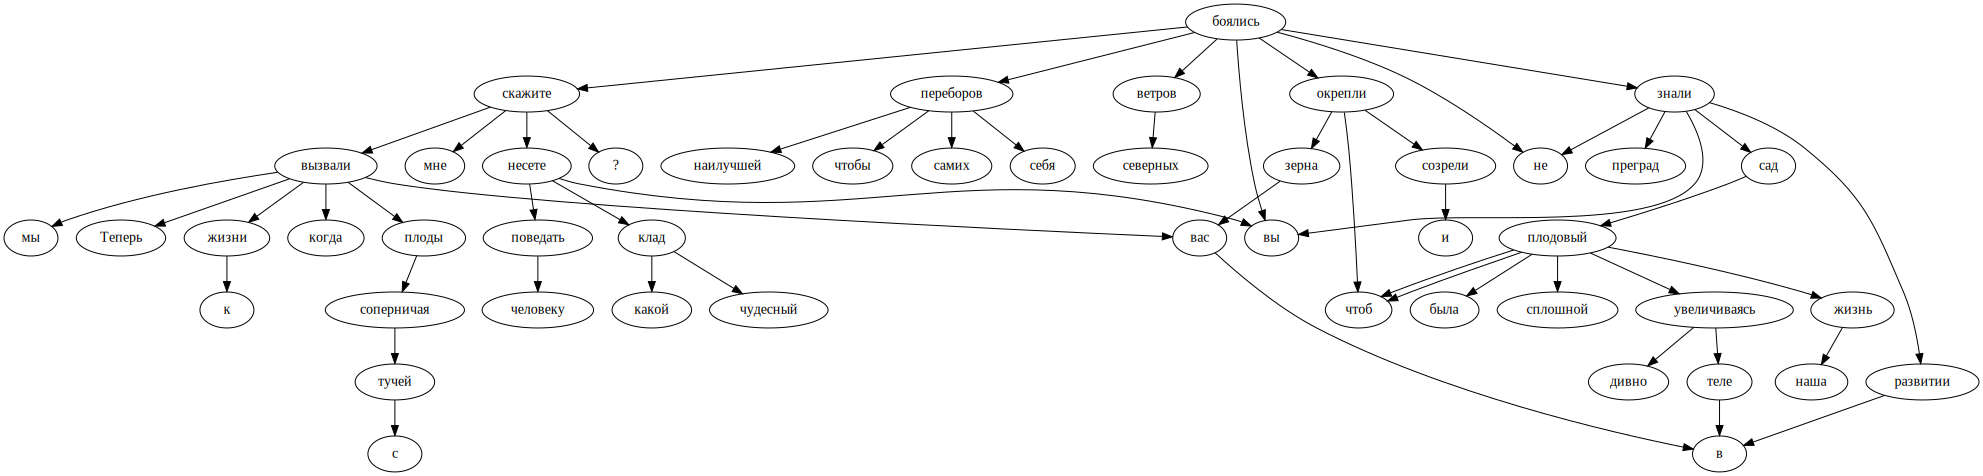

In [26]:
dot

In [28]:
import graphviz
f = graphviz.Digraph('finite_state_machine', filename='fsm.gv')
f.attr('node', shape='box')
f.attr(rankdir='LR', size='10')

In [29]:
#создаем связи по 3-ему столбцу (т.к индексы с 0, то каждое значение будет на 1 меньше)
for i in range (df.shape[0]):
    index = df.iloc[i]['g'] - 1
    if index != -1: # root
        f.edge((df.iloc[index]['w']), (df.iloc[i]['w']), label = df.iloc[i]['f'])

In [147]:
#получаем дерево на боку
f.view() 

'fsm.gv.pdf'

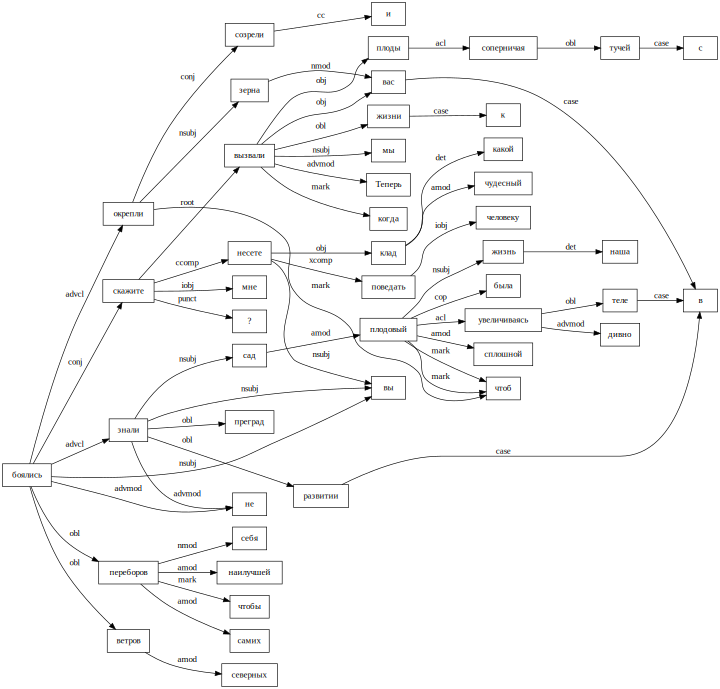

In [30]:
f